# Precipitation Over Niger 

In [1]:
import netCDF4 as nc
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
from cartopy import feature as cfeature
# from warnings import filterwarnings
# filterwarnings('ignore')

In [2]:
Niger_data=xr.open_dataset('Niger.nc')
Niger_data


<xarray.Dataset>
Dimensions:   (datetime: 3652, lon: 65, lat: 79)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
  * lon       (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 15.0 15.25 15.5 15.75 16.0
  * lat       (lat) float32 24.0 23.75 23.5 23.25 23.0 ... 5.5 5.25 5.0 4.75 4.5
Data variables:
    crs       int32 ...
    precip    (datetime, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon May 01 21:27:32 2023: cdo mergetime PERSIANN_Niger_2023...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

In [3]:

Niger_precip=Niger_data['precip'].sel(lat=17.6078,lon=8.80817,method='nearest')
Niger_precip=Niger_precip.where(Niger_precip !=-99.0)
Niger_precip

/home/geek/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/geek/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


<xarray.DataArray 'precip' (datetime: 3652)>
array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
    lon       float32 8.75
    lat       float32 17.5
Attributes:
    grid_mapping:  crs

In [4]:
Niger_precip.groupby("datetime.month").sum('datetime')

Monthly_climatology=Niger_precip.groupby("datetime.month").mean("datetime")



In [5]:
Monthly_climatology

<xarray.DataArray 'precip' (month: 12)>
array([0.06164517, 0.00666667, 0.04446602, 0.06236667, 0.3199355 ,
       0.5839667 , 0.7801935 , 1.9857099 , 0.47743332, 0.03851613,
       0.01483333, 0.05012903], dtype=float32)
Coordinates:
    lon      float32 8.75
    lat      float32 17.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

# ANNUAL VARIABILITY AND AVERAGE PLOTS

In [6]:
Annual_T=Niger_precip.groupby("datetime.year").sum("datetime")

In [7]:
Annual_T=Annual_T.values
Annual_T


array([ 74.649994, 146.81    , 192.24002 , 187.01001 , 139.38    ,
        68.61    , 144.11    ,  83.409996, 161.25    , 162.93    ],
      dtype=float32)

In [8]:
year = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010']
data = {'year': year, 
        'Annual Total Rainfall': Annual_T}
Annual_Total= pd.DataFrame(data=data)
Annual_Total

year  Annual Total Rainfall
0  2001              74.649994
1  2002             146.809998
2  2003             192.240021
3  2004             187.010010
4  2005             139.380005
5  2006              68.610001
6  2007             144.110001
7  2008              83.409996
8  2009             161.250000
9  2010             162.929993

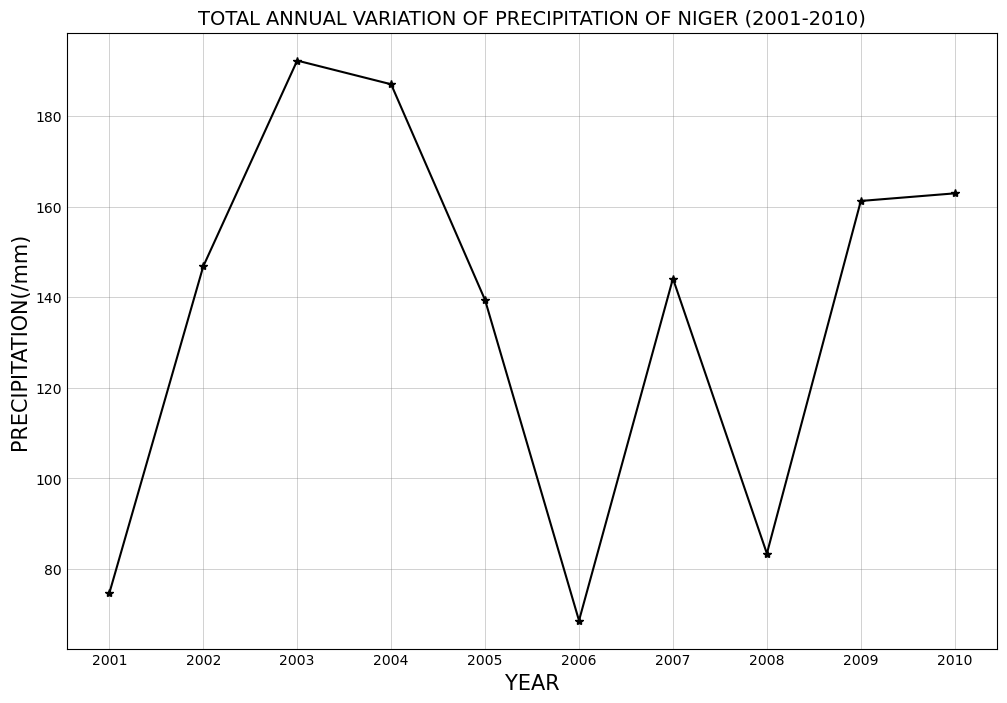

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(Annual_Total['year'], Annual_Total['Annual Total Rainfall'], label='Rainfall', color='black', marker='*')
ax.set_xlabel('YEAR',fontsize=15,color='black')
ax.set_ylabel('PRECIPITATION(/mm)',fontsize=15,color='black')
ax.set_title('TOTAL ANNUAL VARIATION OF PRECIPITATION OF NIGER (2001-2010)',fontsize=14)
ax.grid(linestyle='-', linewidth=0.5, color='grey', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)

plt.savefig('00.png');

In [10]:
Annual_climatology=Niger_precip.groupby("datetime.year").mean("datetime")
Annual_climatology=Annual_climatology.data
Annual_climatology

array([0.20452054, 0.40221918, 0.526685  , 0.5109563 , 0.38186303,
       0.1879726 , 0.3948219 , 0.22852054, 0.44178084, 0.44638354],
      dtype=float32)

In [11]:
year = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010']
data = {'year': year,  'Annual Climatology': Annual_climatology}
Annual_climatology= pd.DataFrame(data=data)
Annual_climatology

year  Annual Climatology
0  2001            0.204521
1  2002            0.402219
2  2003            0.526685
3  2004            0.510956
4  2005            0.381863
5  2006            0.187973
6  2007            0.394822
7  2008            0.228521
8  2009            0.441781
9  2010            0.446384

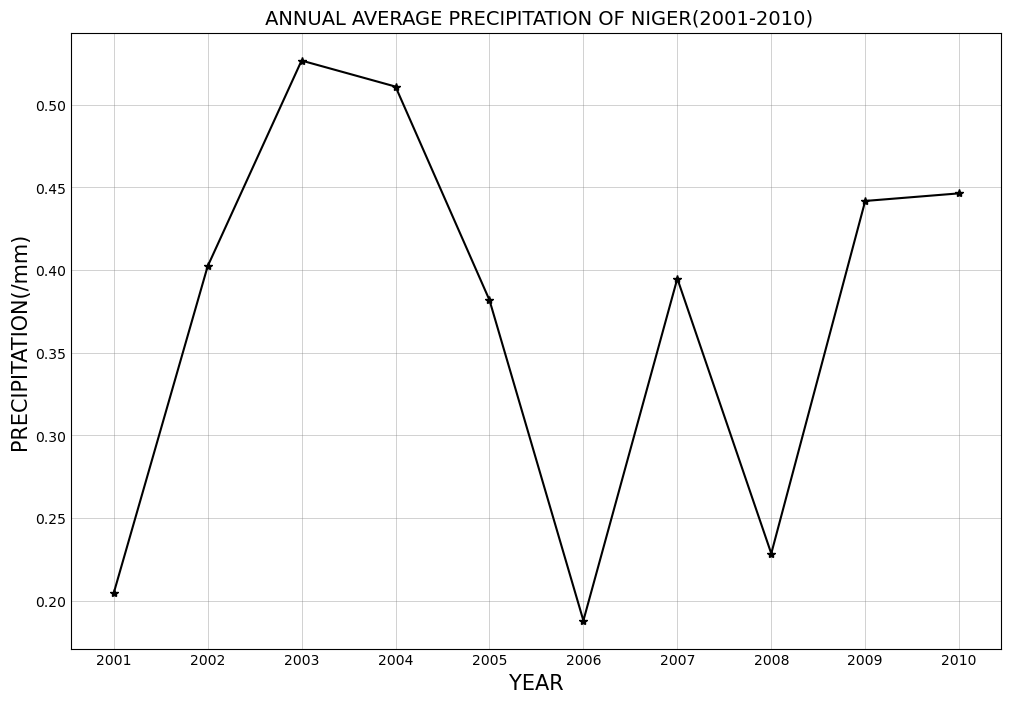

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(Annual_climatology['year'], Annual_climatology['Annual Climatology'], label='Rainfall', color='black', marker='*')
ax.set_xlabel('YEAR',fontsize=15,color='black',)
ax.set_ylabel('PRECIPITATION(/mm)',fontsize=15,color='black')
ax.set_title(' ANNUAL AVERAGE PRECIPITATION OF NIGER(2001-2010)',fontsize=14)
ax.grid(linestyle='-', linewidth=0.5, color='grey', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)
plt.savefig('01.png');

# DRY DAYS(<1MM) AND WET DAYS(>1MM) FOR NIGER

In [13]:
pre = Niger_precip
dry_days_per_yearly = (pre < 1).groupby('datetime.year').sum(dim='datetime')
dry_days_yearly=dry_days_per_yearly.data
dry_days_yearly

array([353, 346, 333, 341, 342, 352, 347, 349, 347, 342])

In [14]:
dry_days_yearly

array([353, 346, 333, 341, 342, 352, 347, 349, 347, 342])

In [15]:
year = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010']
data = {'year': year,  'Dry days': dry_days_yearly}
Dry_days1= pd.DataFrame(data=data)
Dry_days1

year  Dry days
0  2001       353
1  2002       346
2  2003       333
3  2004       341
4  2005       342
5  2006       352
6  2007       347
7  2008       349
8  2009       347
9  2010       342

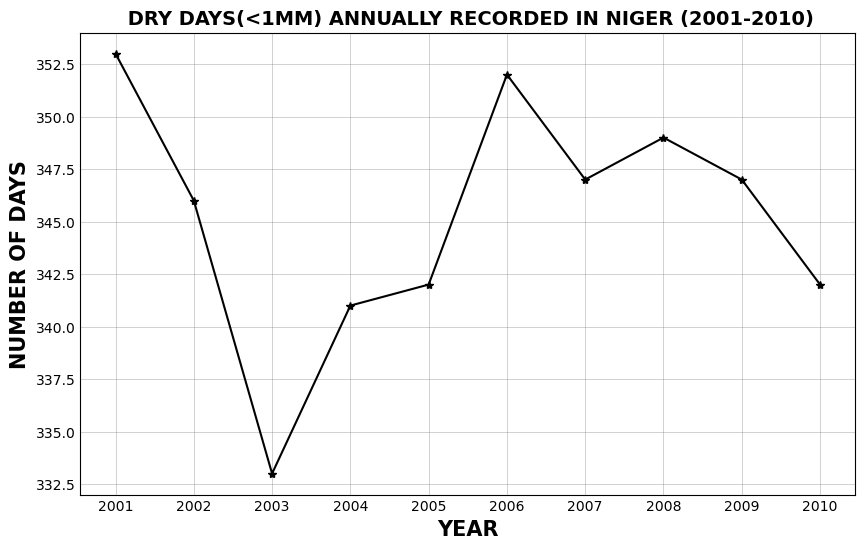

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Dry_days1['year'], Dry_days1['Dry days'], label='Dry Days', color='black', marker='*')
ax.set_xlabel('YEAR',fontsize=15,fontweight='bold',color='black')
ax.set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='black')
ax.set_title(' DRY DAYS(<1MM) ANNUALLY RECORDED IN NIGER (2001-2010)',fontweight='bold',fontsize=14)
ax.grid(linestyle='-', linewidth=0.5, color='grey', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)
plt.savefig('1.png');

In [17]:
pre= Niger_precip

# WetDays Over China
wet_days_per_year = (pre >= 1).groupby('datetime.year').sum(dim='datetime')
wet_days_per_year 
wet_days_year=wet_days_per_year.data
wet_days_year

array([12, 19, 32, 25, 23, 13, 18, 16, 18, 23])

In [18]:
year = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010']
data = {'year': year,  'Wet days': wet_days_year}
Wet_days= pd.DataFrame(data=data)
Wet_days

year  Wet days
0  2001        12
1  2002        19
2  2003        32
3  2004        25
4  2005        23
5  2006        13
6  2007        18
7  2008        16
8  2009        18
9  2010        23

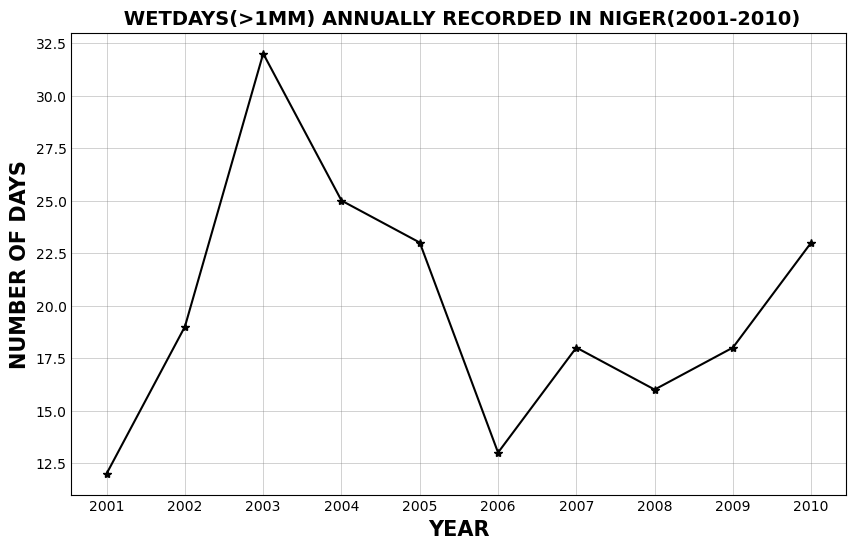

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Wet_days['year'], Wet_days['Wet days'], label='Dry Days', color='black', marker='*')
ax.set_xlabel('YEAR',fontsize=15,fontweight='bold',color='black')
ax.set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='black')
ax.set_title(' WETDAYS(>1MM) ANNUALLY RECORDED IN NIGER(2001-2010)',fontweight='bold',fontsize=14)
ax.grid(linestyle='-', linewidth=0.5, color='grey', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)
plt.savefig('2.png');

In [20]:
pre =Niger_precip

# 
wet_days_per_month = (pre >=1).groupby('datetime.month').sum(dim='datetime')
wet_days_month=wet_days_per_month.values
wet_days_month

array([ 6,  0,  3,  3, 16, 25, 48, 70, 20,  4,  2,  2])

In [21]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
data = {'months': month, 'wet days': wet_days_month}
Wet_days= pd.DataFrame(data=data)
Wet_days

months  wet days
0     Jan         6
1     Feb         0
2     Mar         3
3     Apr         3
4     May        16
5     Jun        25
6    July        48
7     Aug        70
8    Sept        20
9     Oct         4
10    Nov         2
11    Dec         2

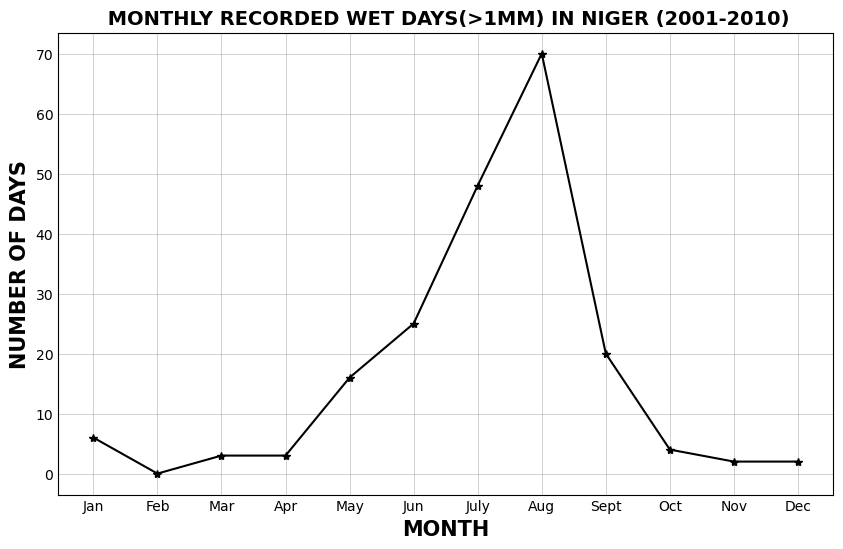

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Wet_days['months'], Wet_days['wet days'], label='Dry Days', color='black', marker='*')
ax.set_xlabel('MONTH',fontsize=15,fontweight='bold',color='black')
ax.set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='black')
ax.set_title(' MONTHLY RECORDED WET DAYS(>1MM) IN NIGER (2001-2010)',fontweight='bold',fontsize=14)
ax.grid(linestyle='-', linewidth=0.5, color='grey', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)
plt.savefig('0-3.png');

In [23]:
pre =Niger_precip
dry_days_per_month = (pre <1).groupby('datetime.month').sum(dim='datetime')
dry_days_month=dry_days_per_month.values
dry_days_month

array([304, 282, 306, 297, 294, 275, 262, 240, 280, 306, 298, 308])

In [24]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
data = {'months': month, 'dry days': dry_days_month}
Dry_days= pd.DataFrame(data=data)
Dry_days

months  dry days
0     Jan       304
1     Feb       282
2     Mar       306
3     Apr       297
4     May       294
5     Jun       275
6    July       262
7     Aug       240
8    Sept       280
9     Oct       306
10    Nov       298
11    Dec       308

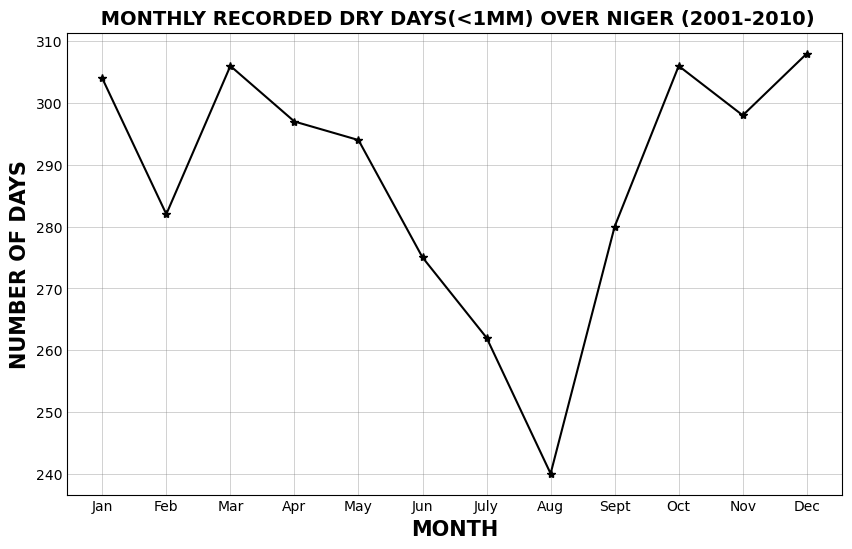

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Dry_days['months'], Dry_days['dry days'], label='Dry Days', color='black', marker='*')
ax.set_xlabel('MONTH',fontsize=15,fontweight='bold',color='black')
ax.set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='black')
ax.set_title(' MONTHLY RECORDED DRY DAYS(<1MM) OVER NIGER (2001-2010)',fontweight='bold',fontsize=14)
ax.grid(linestyle='-', linewidth=0.5, color='grey', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)
plt.savefig('3.png');

# DRY AND WET INDICES(>10MM,>20MM)

In [26]:
indices_rain1=pre.where(pre>10).groupby('datetime.year').count()
indices_rain1=indices_rain1.values
indices_rain1

array([2, 4, 4, 6, 4, 2, 4, 2, 4, 5])

In [27]:
year = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010']
data = {'year': year, 'Wet days':indices_rain1}
Wet_days= pd.DataFrame(data=data)
Wet_days

year  Wet days
0  2001         2
1  2002         4
2  2003         4
3  2004         6
4  2005         4
5  2006         2
6  2007         4
7  2008         2
8  2009         4
9  2010         5

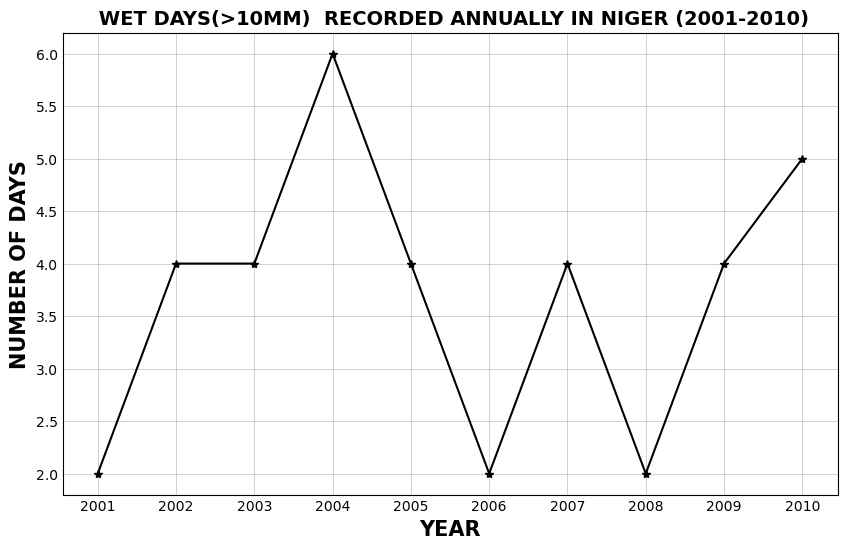

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Wet_days['year'],Wet_days['Wet days'], label='Wet Days', color='black', marker='*')
ax.set_xlabel('YEAR',fontsize=15,fontweight='bold',color='black',)
ax.set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='black')
ax.set_title(' WET DAYS(>10MM)  RECORDED ANNUALLY IN NIGER (2001-2010)',fontweight='bold',fontsize=14)
ax.grid(linestyle='-', linewidth=0.5, color='grey', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)
plt.savefig('4.png');

In [29]:
indices_rain2=pre.where(pre>20).groupby('datetime.year').count()
indices_rain2=indices_rain2.values
indices_rain2

array([1, 2, 1, 4, 2, 1, 2, 1, 3, 2])

In [30]:
year = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010']
data = {'year': year, 'Wet days':indices_rain2}
Wet_days= pd.DataFrame(data=data)
Wet_days

year  Wet days
0  2001         1
1  2002         2
2  2003         1
3  2004         4
4  2005         2
5  2006         1
6  2007         2
7  2008         1
8  2009         3
9  2010         2

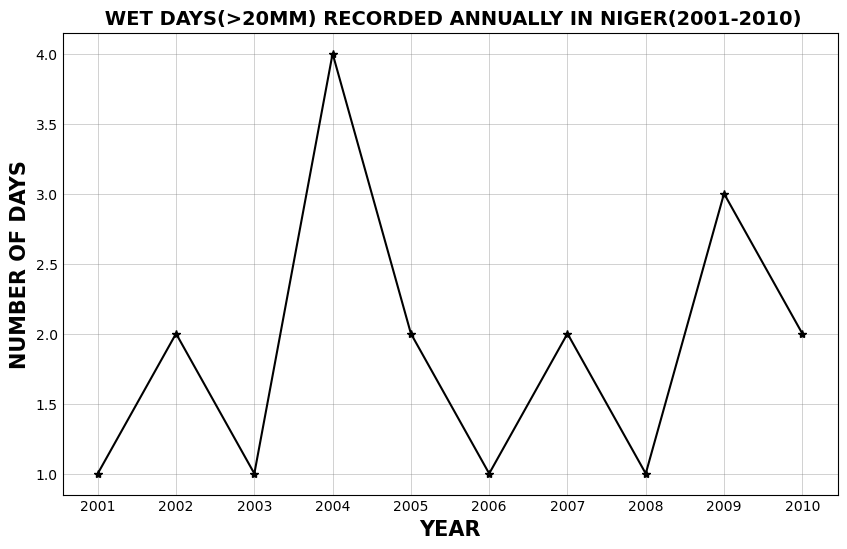

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Wet_days['year'],Wet_days['Wet days'], label='Wet Days', color='black', marker='*')
ax.set_xlabel('YEAR',fontsize=15,fontweight='bold',color='black',)
ax.set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='black')
ax.set_title(' WET DAYS(>20MM) RECORDED ANNUALLY IN NIGER(2001-2010)',fontweight='bold',fontsize=14)
ax.grid(linestyle='-', linewidth=0.5, color='grey', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)
plt.savefig('5.png');

In [32]:
indices_rain_10mm=pre.where(pre>10).groupby('datetime.month').count()
indices_rain_10mm=indices_rain_10mm.values
indices_rain_10mm

array([ 0,  0,  0,  0,  3,  6,  5, 20,  3,  0,  0,  0])

In [33]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
data = {'months': month, 'wet days':indices_rain_10mm }
Wet_days= pd.DataFrame(data=data)
Wet_days

months  wet days
0     Jan         0
1     Feb         0
2     Mar         0
3     Apr         0
4     May         3
5     Jun         6
6    July         5
7     Aug        20
8    Sept         3
9     Oct         0
10    Nov         0
11    Dec         0

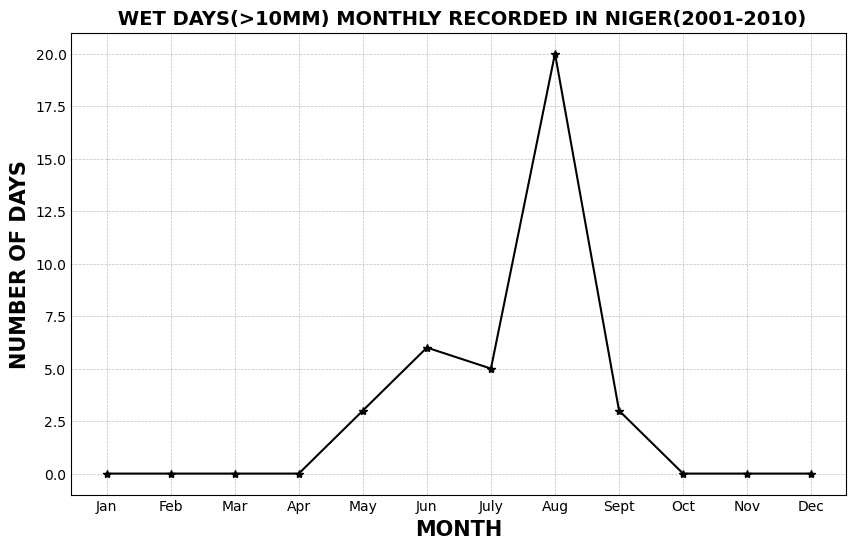

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Wet_days['months'],Wet_days['wet days'], label='Wet Days', color='black', marker='*')
ax.set_xlabel('MONTH',fontsize=15,fontweight='bold',color='black',)
ax.set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='black')
ax.set_title(' WET DAYS(>10MM) MONTHLY RECORDED IN NIGER(2001-2010)',fontweight='bold',fontsize=14)
ax.grid(linestyle='--', linewidth=0.5, color='grey', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)
plt.savefig('6.png');

In [35]:
indices_rain_20mm=pre.where(pre>20).groupby('datetime.month').count()
indices_rain_20mm=indices_rain_20mm.values
indices_rain_20mm

array([ 0,  0,  0,  0,  2,  1,  3, 11,  2,  0,  0,  0])

In [36]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
data = {'months': month, 'wet days':indices_rain_20mm }
Wet_days= pd.DataFrame(data=data)
Wet_days


months  wet days
0     Jan         0
1     Feb         0
2     Mar         0
3     Apr         0
4     May         2
5     Jun         1
6    July         3
7     Aug        11
8    Sept         2
9     Oct         0
10    Nov         0
11    Dec         0

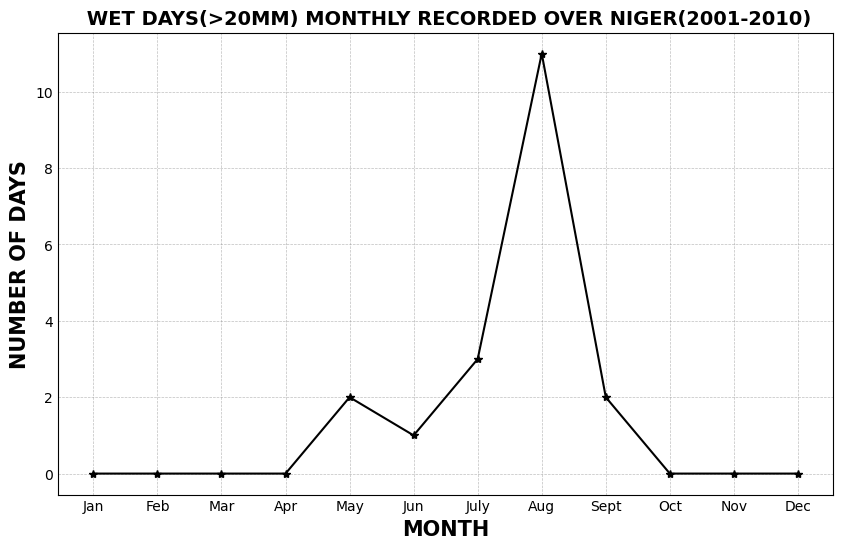

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Wet_days['months'],Wet_days['wet days'], label='Wet Days', color='black', marker='*')
ax.set_xlabel('MONTH',fontsize=15,fontweight='bold',color='black',)
ax.set_ylabel('NUMBER OF DAYS',fontsize=15,fontweight='bold',color='black')
ax.set_title(' WET DAYS(>20MM) MONTHLY RECORDED OVER NIGER(2001-2010)',fontweight='bold',fontsize=14)
ax.grid(linestyle='--', linewidth=0.5, color='grey', alpha=0.5)
ax.tick_params(axis='both', which='both', length=0)
plt.savefig('7.png');

In [38]:
Niger_precipS=xr.open_dataset('Niger.nc')


In [39]:
Niger_precipS=Niger_precipS['precip']
Niger_precipS

<xarray.DataArray 'precip' (datetime: 3652, lat: 79, lon: 65)>
[18753020 values with dtype=float32]
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
  * lon       (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 15.0 15.25 15.5 15.75 16.0
  * lat       (lat) float32 24.0 23.75 23.5 23.25 23.0 ... 5.5 5.25 5.0 4.75 4.5
Attributes:
    grid_mapping:  crs

In [40]:
Niger_precipS=Niger_precipS.where(Niger_precipS!=-99.0)
Niger_precipS

<xarray.DataArray 'precip' (datetime: 3652, lat: 79, lon: 65)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
  * lon       (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 15.0 15.25 15.5 15.75 16.0
  * lat       (lat) float32 24.0 23.75 23.5 23.25 23.0 ... 5.5 5.25 5.0 4.75 4.5
Attributes:
    grid_mapping:  crs

In [41]:
ds=Niger_precipS
# Select the precipitation variable and compute the number of dry days per year
dry_days_per_year = (ds <= 1).groupby('datetime.year').sum(dim='datetime')
dry_days_per_year

<xarray.DataArray 'precip' (year: 10, lat: 79, lon: 65)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 15.0 15.25 15.5 15.75 16.0
  * lat      (lat) float32 24.0 23.75 23.5 23.25 23.0 ... 5.5 5.25 5.0 4.75 4.5
  * year     (year) int64 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010

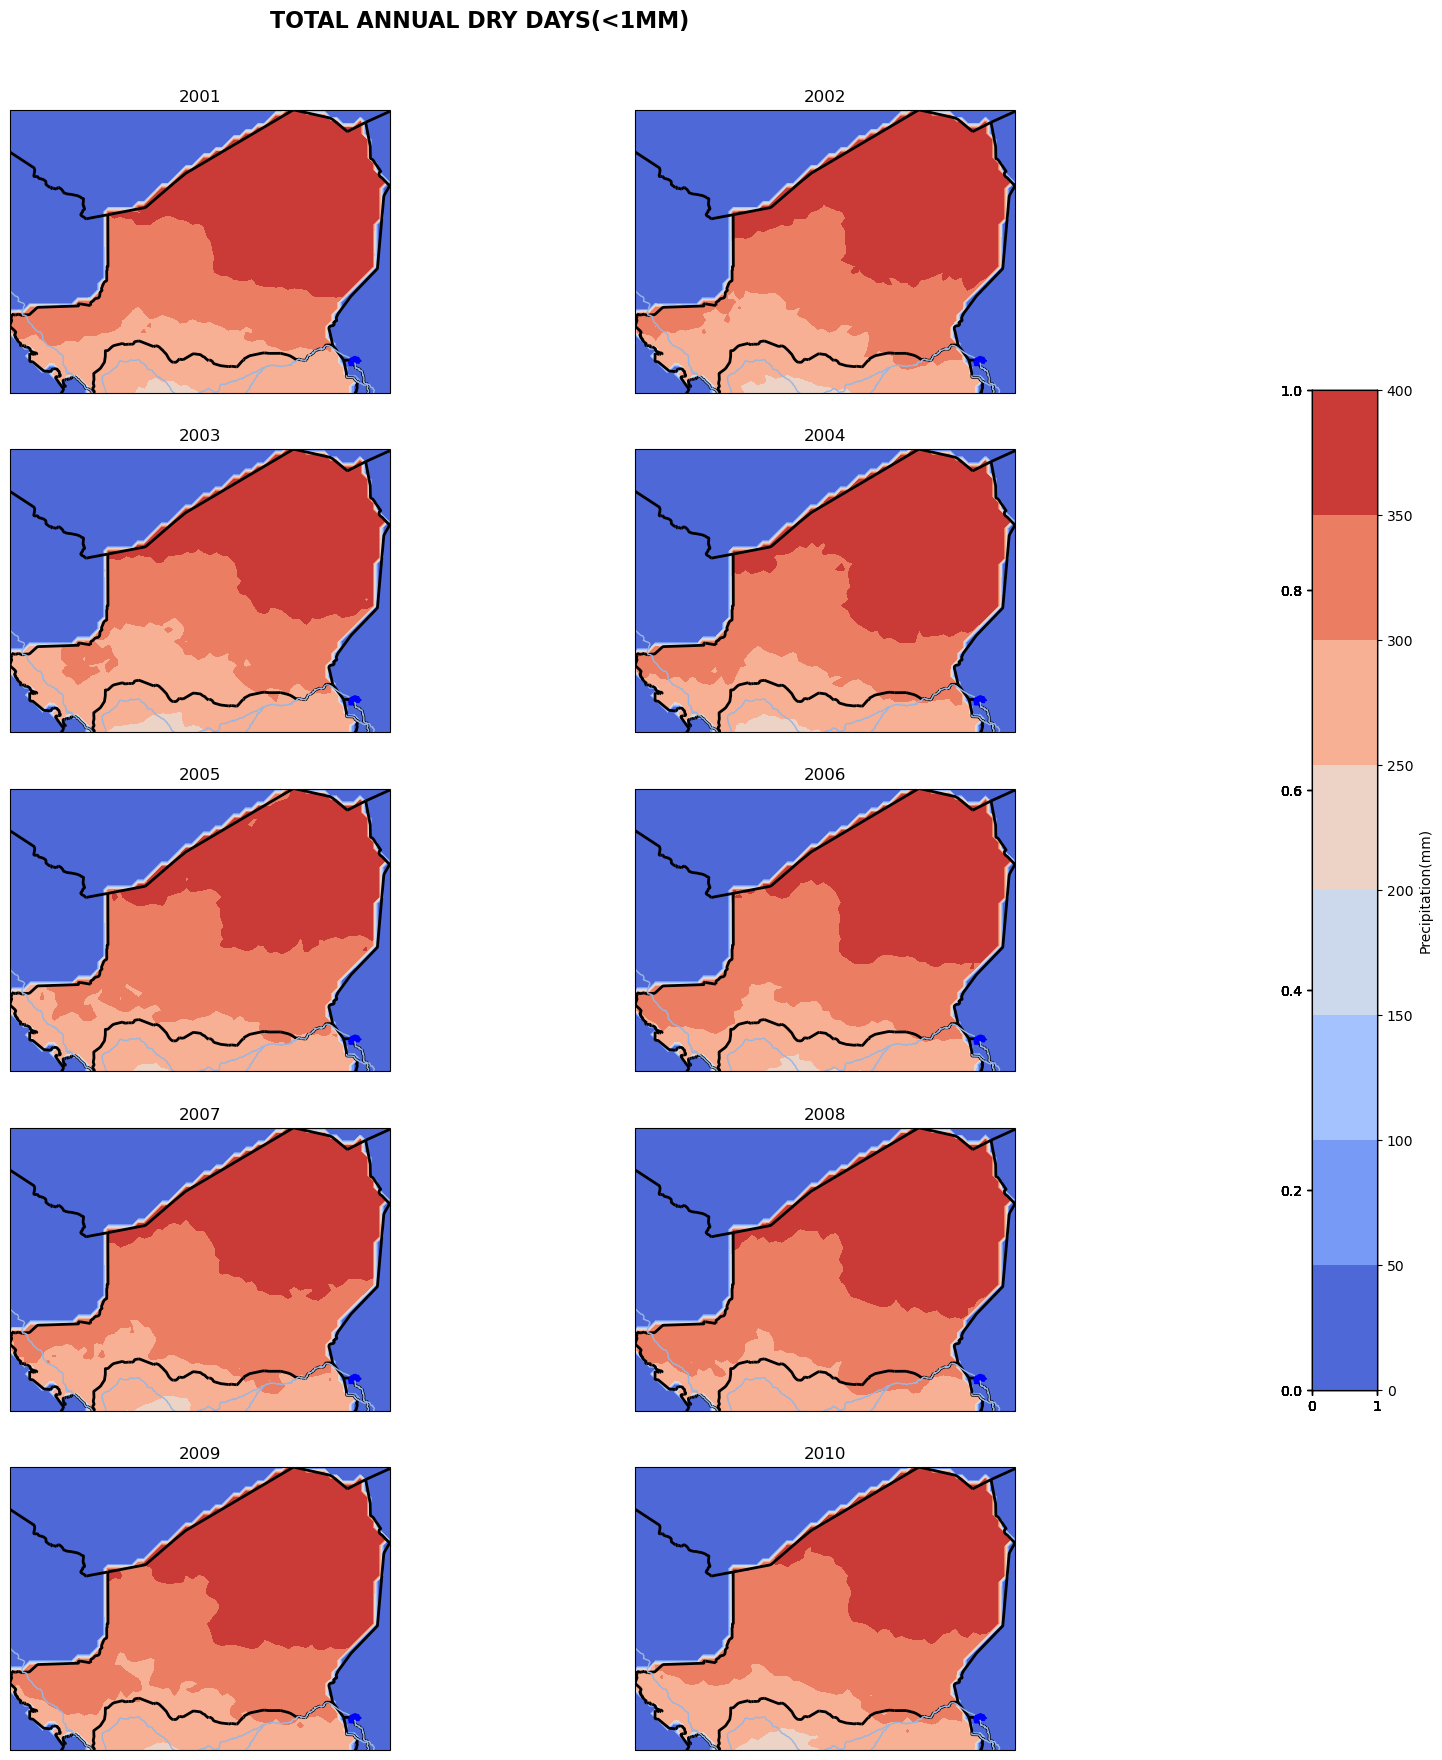

In [42]:
fig,ax=plt.subplots(5,2,figsize=(26,20),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
year=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([0.15,15.98,11.72,23.51], crs=ccrs.PlateCarree())
    ax[i].set_title(year[i])
    cb= ax[i].contourf(dry_days_per_year.lon,dry_days_per_year.lat,dry_days_per_year[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('TOTAL ANNUAL DRY DAYS(<1MM)', fontweight='bold',fontsize=16);
plt.savefig('7.png');

In [43]:
ds = Niger_precipS
wet_days_per_year = (ds >= 1).groupby('datetime.year').sum(dim='datetime')

In [44]:
wet_days_per_year

<xarray.DataArray 'precip' (year: 10, lat: 79, lon: 65)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 15.0 15.25 15.5 15.75 16.0
  * lat      (lat) float32 24.0 23.75 23.5 23.25 23.0 ... 5.5 5.25 5.0 4.75 4.5
  * year     (year) int64 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010

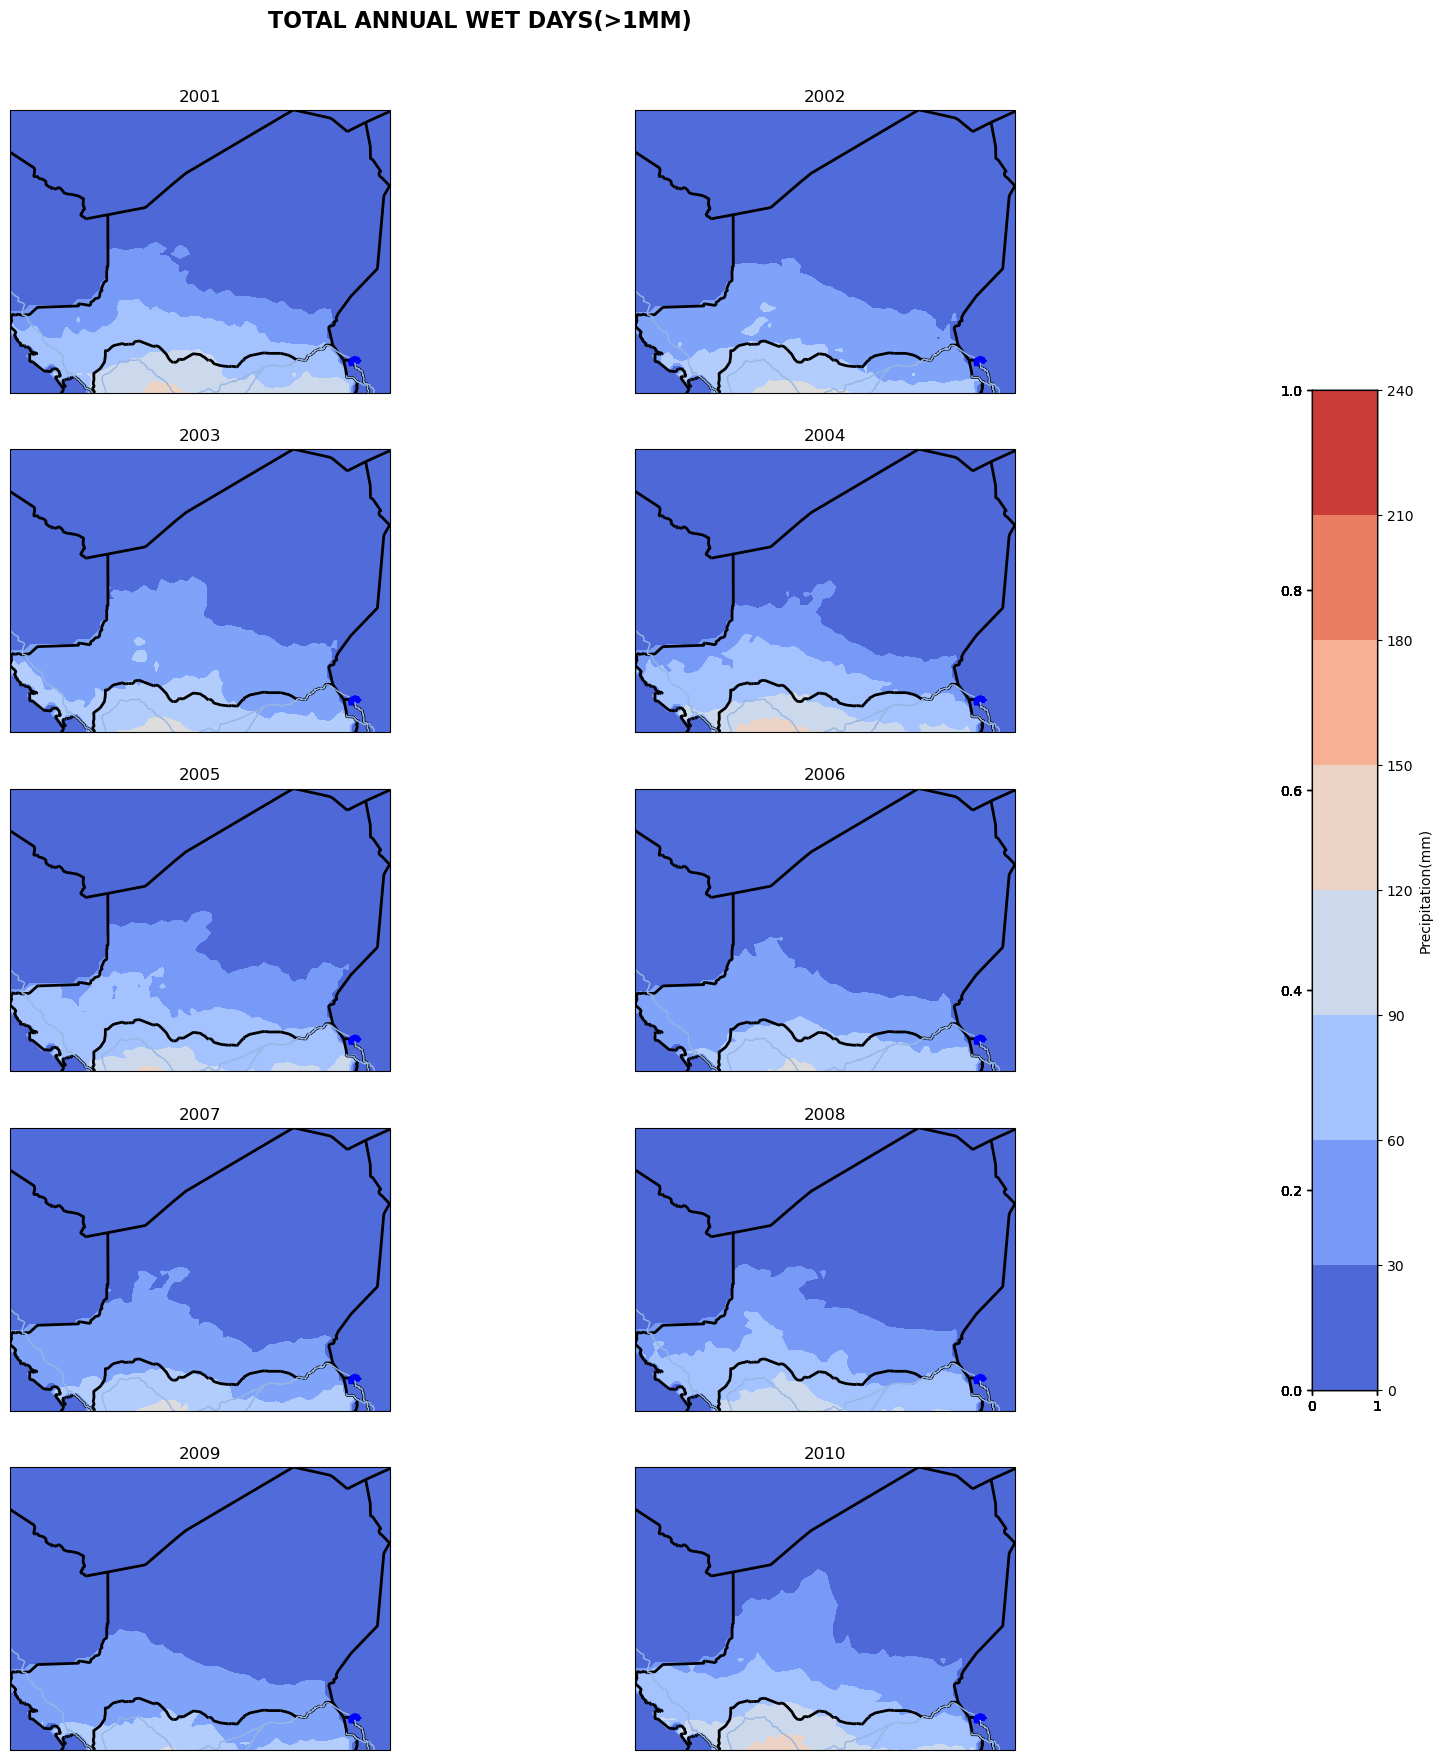

In [45]:
  fig,ax=plt.subplots(5,2,figsize=(26,20),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
year=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([0.15,15.98,11.72,23.51], crs=ccrs.PlateCarree())
    ax[i].set_title(year[i])
    cb= ax[i].contourf(wet_days_per_year.lon,wet_days_per_year.lat,wet_days_per_year[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('TOTAL ANNUAL WET DAYS(>1MM)', fontweight='bold',fontsize=16);
plt.savefig('8.png');

In [46]:
wet_days_per_year1 = (ds>10).groupby('datetime.year').sum(dim='datetime')
wet_days_per_year1

<xarray.DataArray 'precip' (year: 10, lat: 79, lon: 65)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 15.0 15.25 15.5 15.75 16.0
  * lat      (lat) float32 24.0 23.75 23.5 23.25 23.0 ... 5.5 5.25 5.0 4.75 4.5
  * year     (year) int64 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010

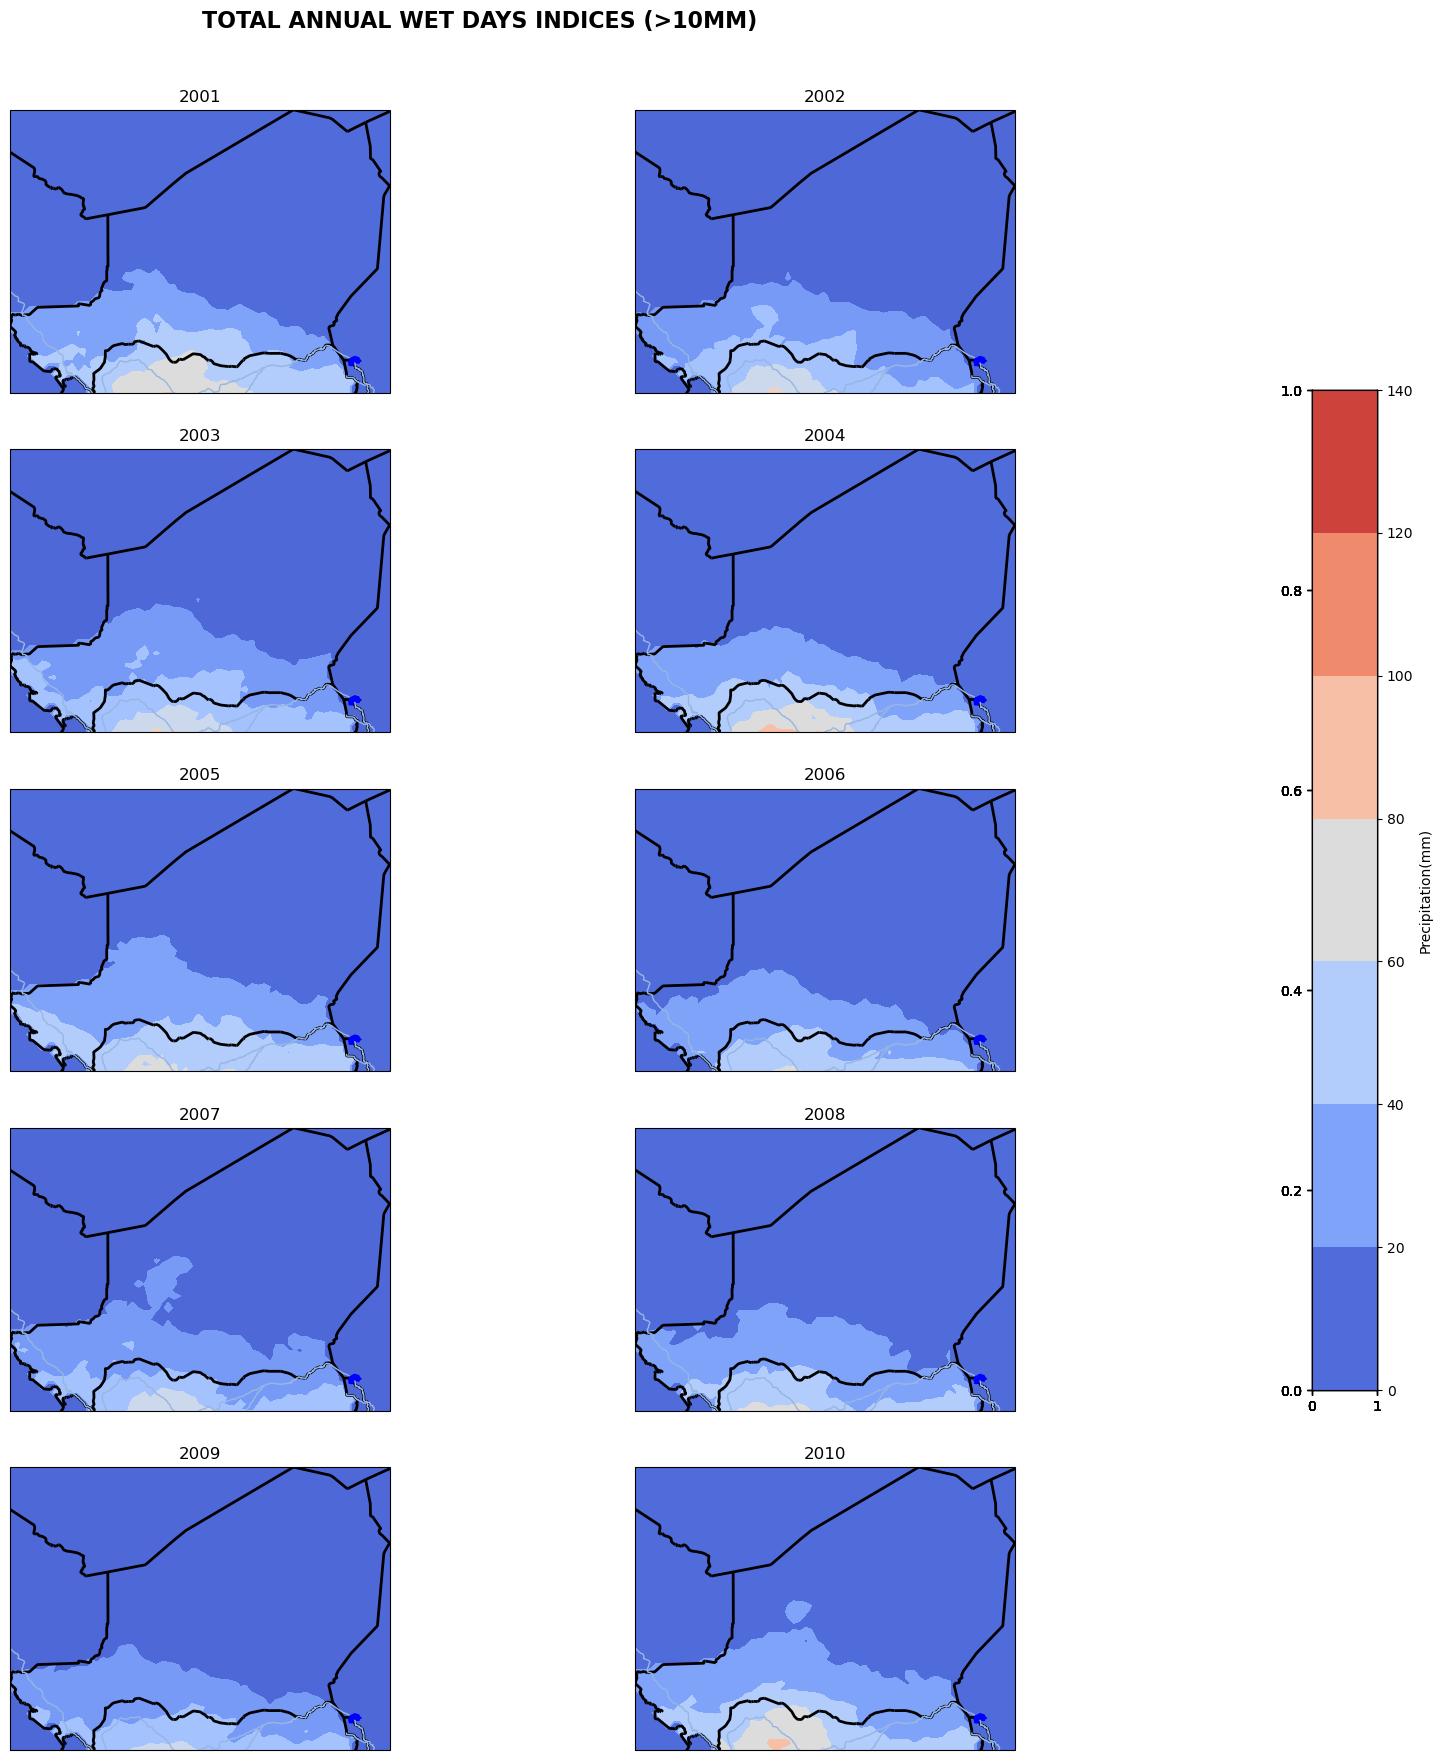

In [47]:
fig,ax=plt.subplots(5,2,figsize=(26,20),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
year=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    #ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([0.15,15.98,11.72,23.51], crs=ccrs.PlateCarree())
    ax[i].set_title(year[i])
    cb= ax[i].contourf(wet_days_per_year1.lon,wet_days_per_year1.lat,wet_days_per_year1[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('TOTAL ANNUAL WET DAYS INDICES (>10MM)', fontweight='bold',fontsize=16);
plt.savefig('9.png');


In [48]:
wet_days_per_year2 = (ds>20).groupby('datetime.year').sum(dim='datetime')
wet_days_per_year2

<xarray.DataArray 'precip' (year: 10, lat: 79, lon: 65)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 15.0 15.25 15.5 15.75 16.0
  * lat      (lat) float32 24.0 23.75 23.5 23.25 23.0 ... 5.5 5.25 5.0 4.75 4.5
  * year     (year) int64 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010

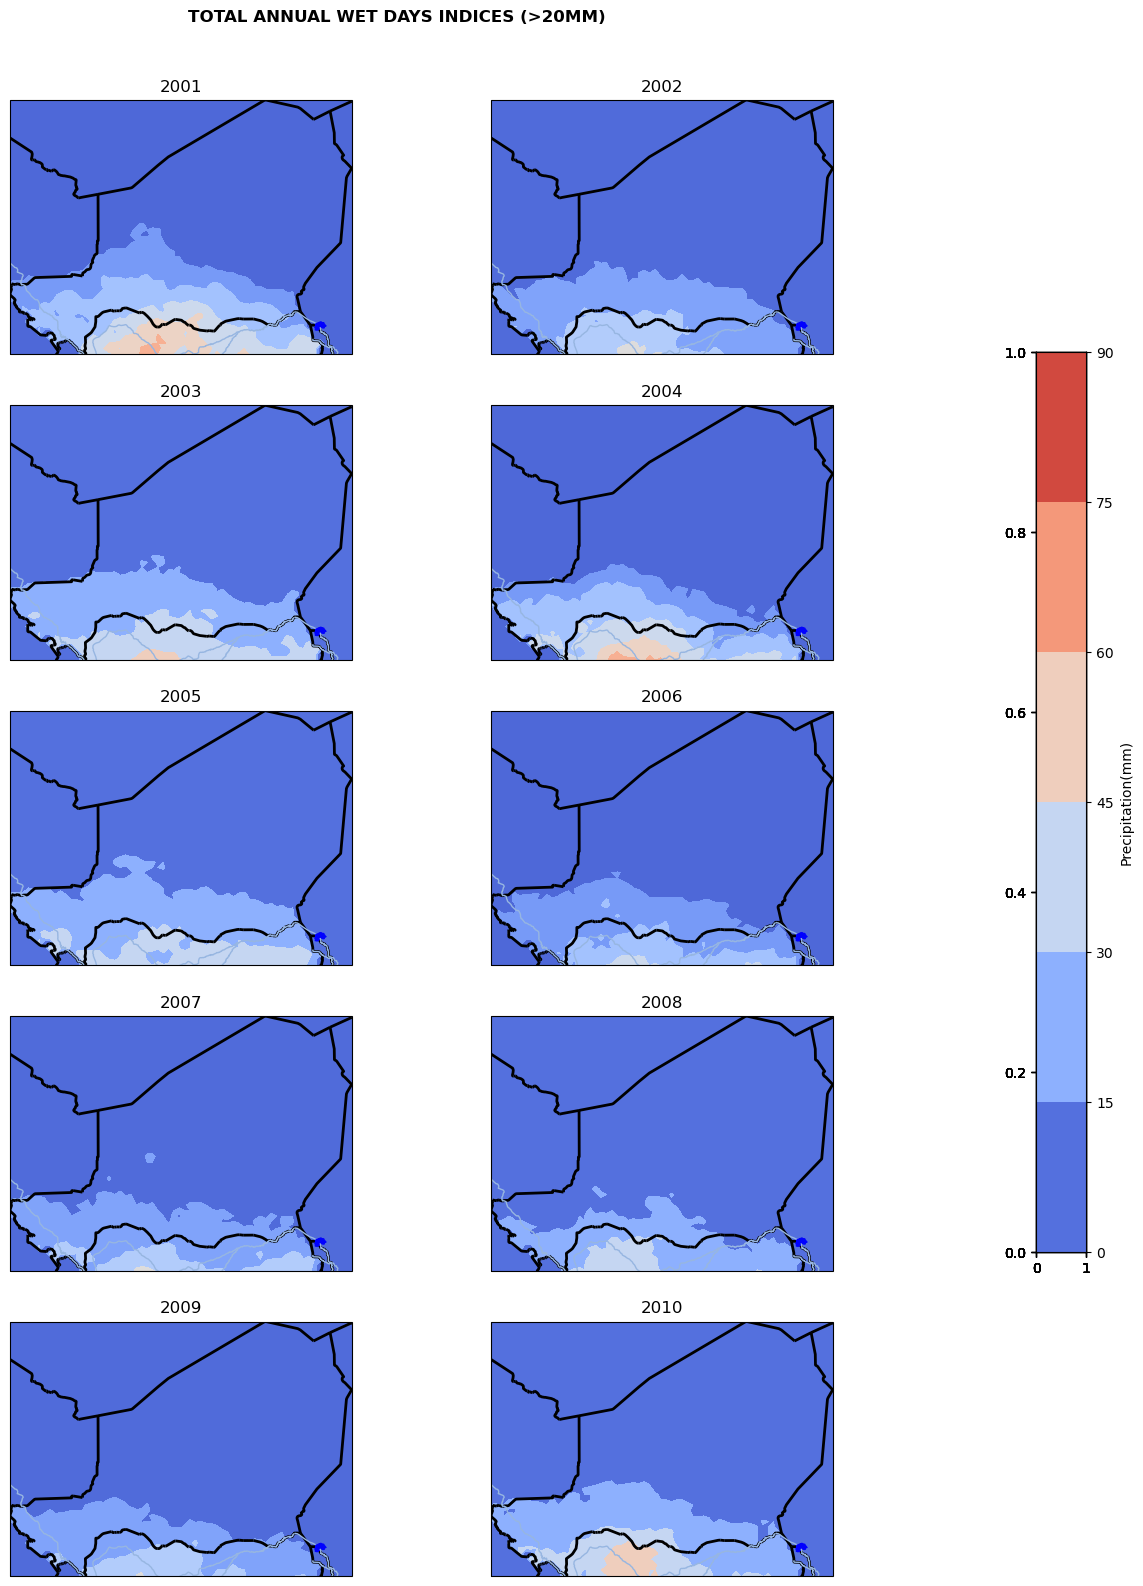

In [49]:
fig,ax=plt.subplots(5,2,figsize=(20,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
year_names=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([0.15,15.98,11.72,23.51], crs=ccrs.PlateCarree())
    ax[i].set_title(year_names[i])
    cb= ax[i].contourf(wet_days_per_year2.lon,wet_days_per_year2.lat,wet_days_per_year2[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('TOTAL ANNUAL WET DAYS INDICES (>20MM)', fontweight='bold');
plt.savefig('10.png');

In [50]:
wet_days_per_month1= (ds>1).groupby('datetime.month').sum(dim='datetime')
wet_days_per_month1

<xarray.DataArray 'precip' (month: 12, lat: 79, lon: 65)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 15.0 15.25 15.5 15.75 16.0
  * lat      (lat) float32 24.0 23.75 23.5 23.25 23.0 ... 5.5 5.25 5.0 4.75 4.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

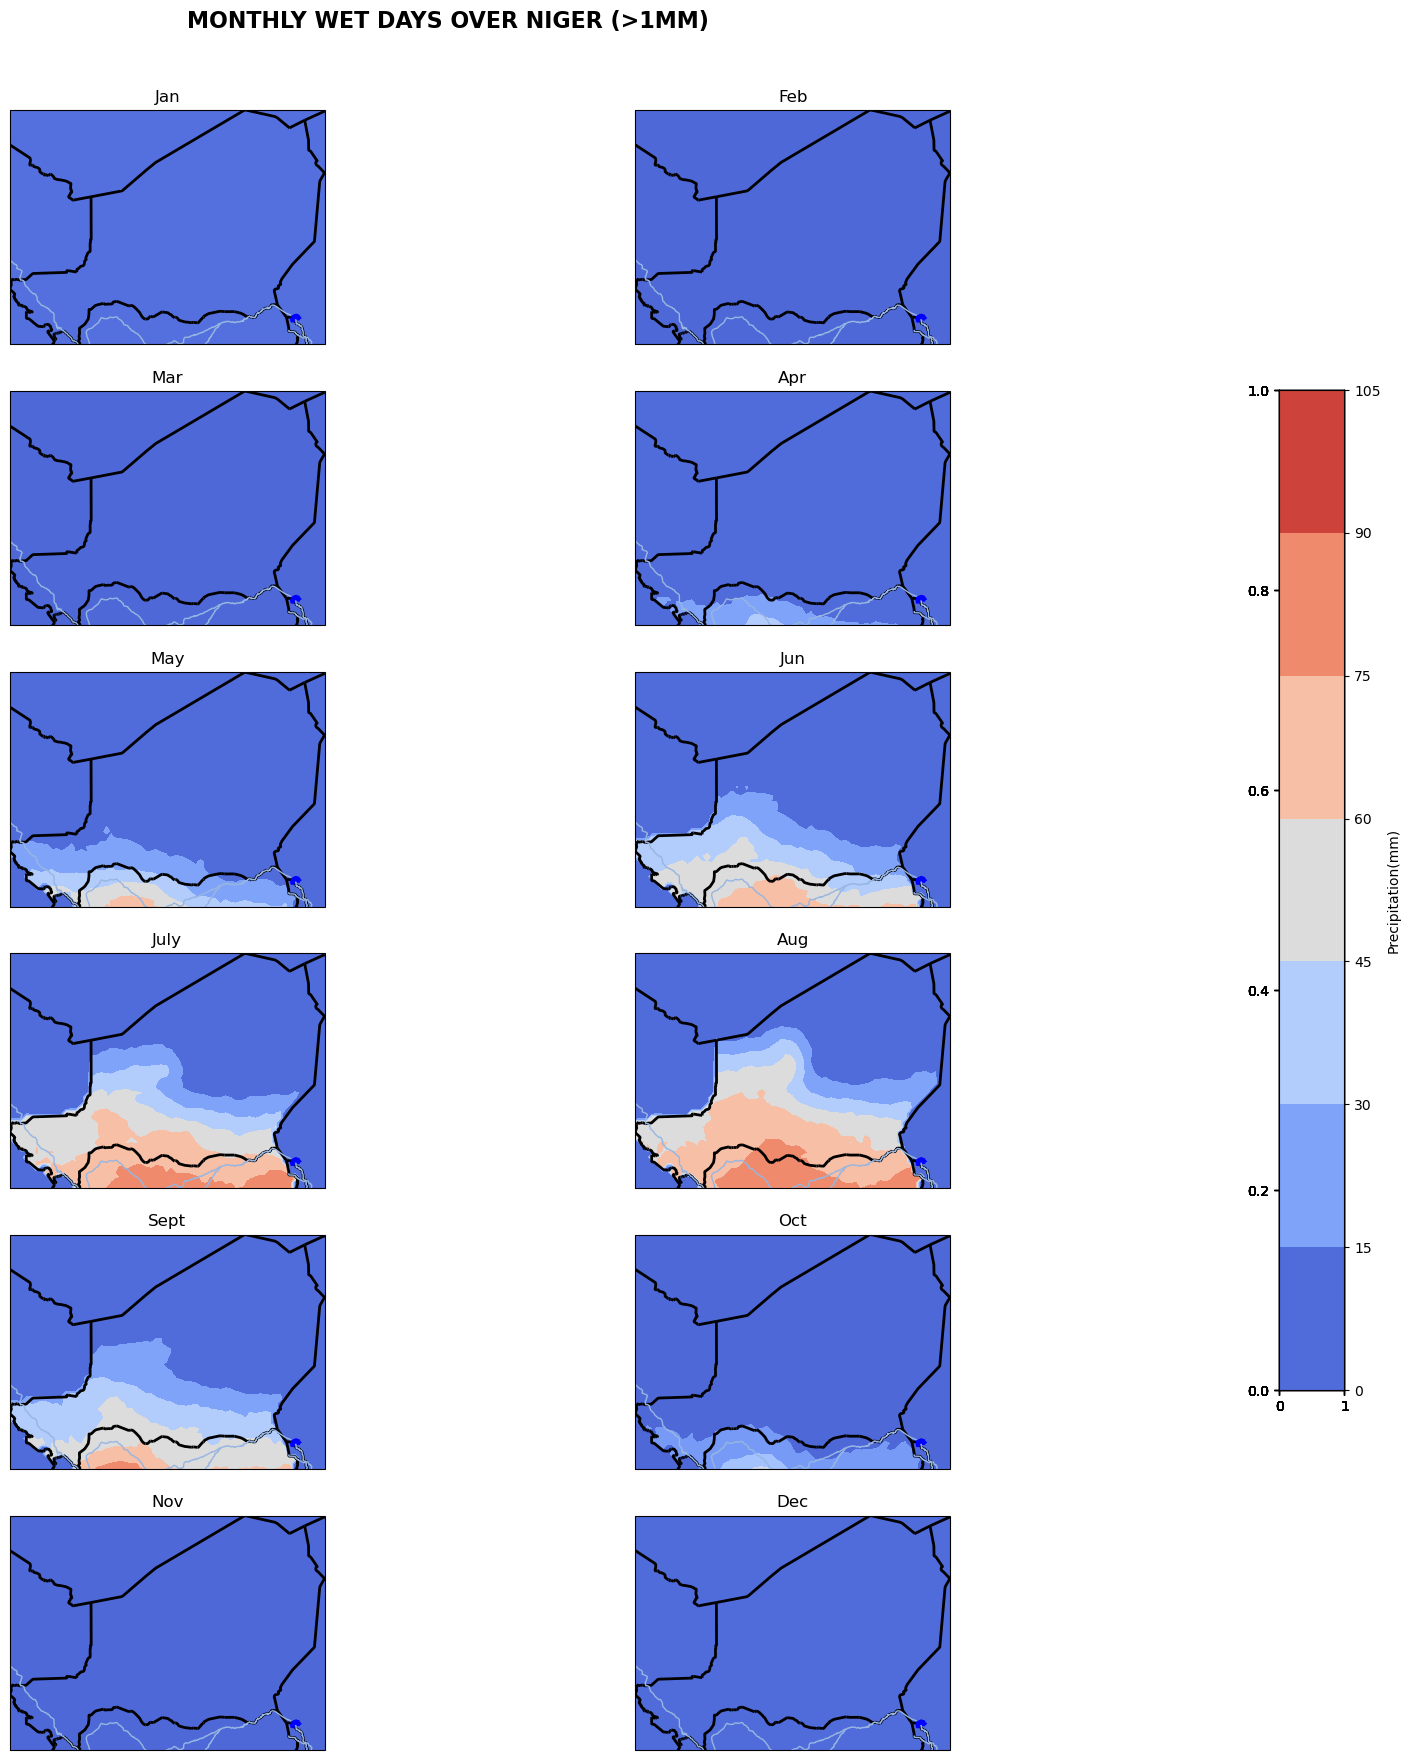

In [51]:
fig,ax=plt.subplots(6,2,figsize=(26,20),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([0.15,15.98,11.72,23.51], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_per_month1.lon,wet_days_per_month1.lat,wet_days_per_month1[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY WET DAYS OVER NIGER (>1MM)', fontweight='bold',fontsize=16);
plt.savefig('11.png');

In [52]:
dry_days_per_month2= (ds<1).groupby('datetime.month').sum(dim='datetime')
dry_days_per_month2

<xarray.DataArray 'precip' (month: 12, lat: 79, lon: 65)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 15.0 15.25 15.5 15.75 16.0
  * lat      (lat) float32 24.0 23.75 23.5 23.25 23.0 ... 5.5 5.25 5.0 4.75 4.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

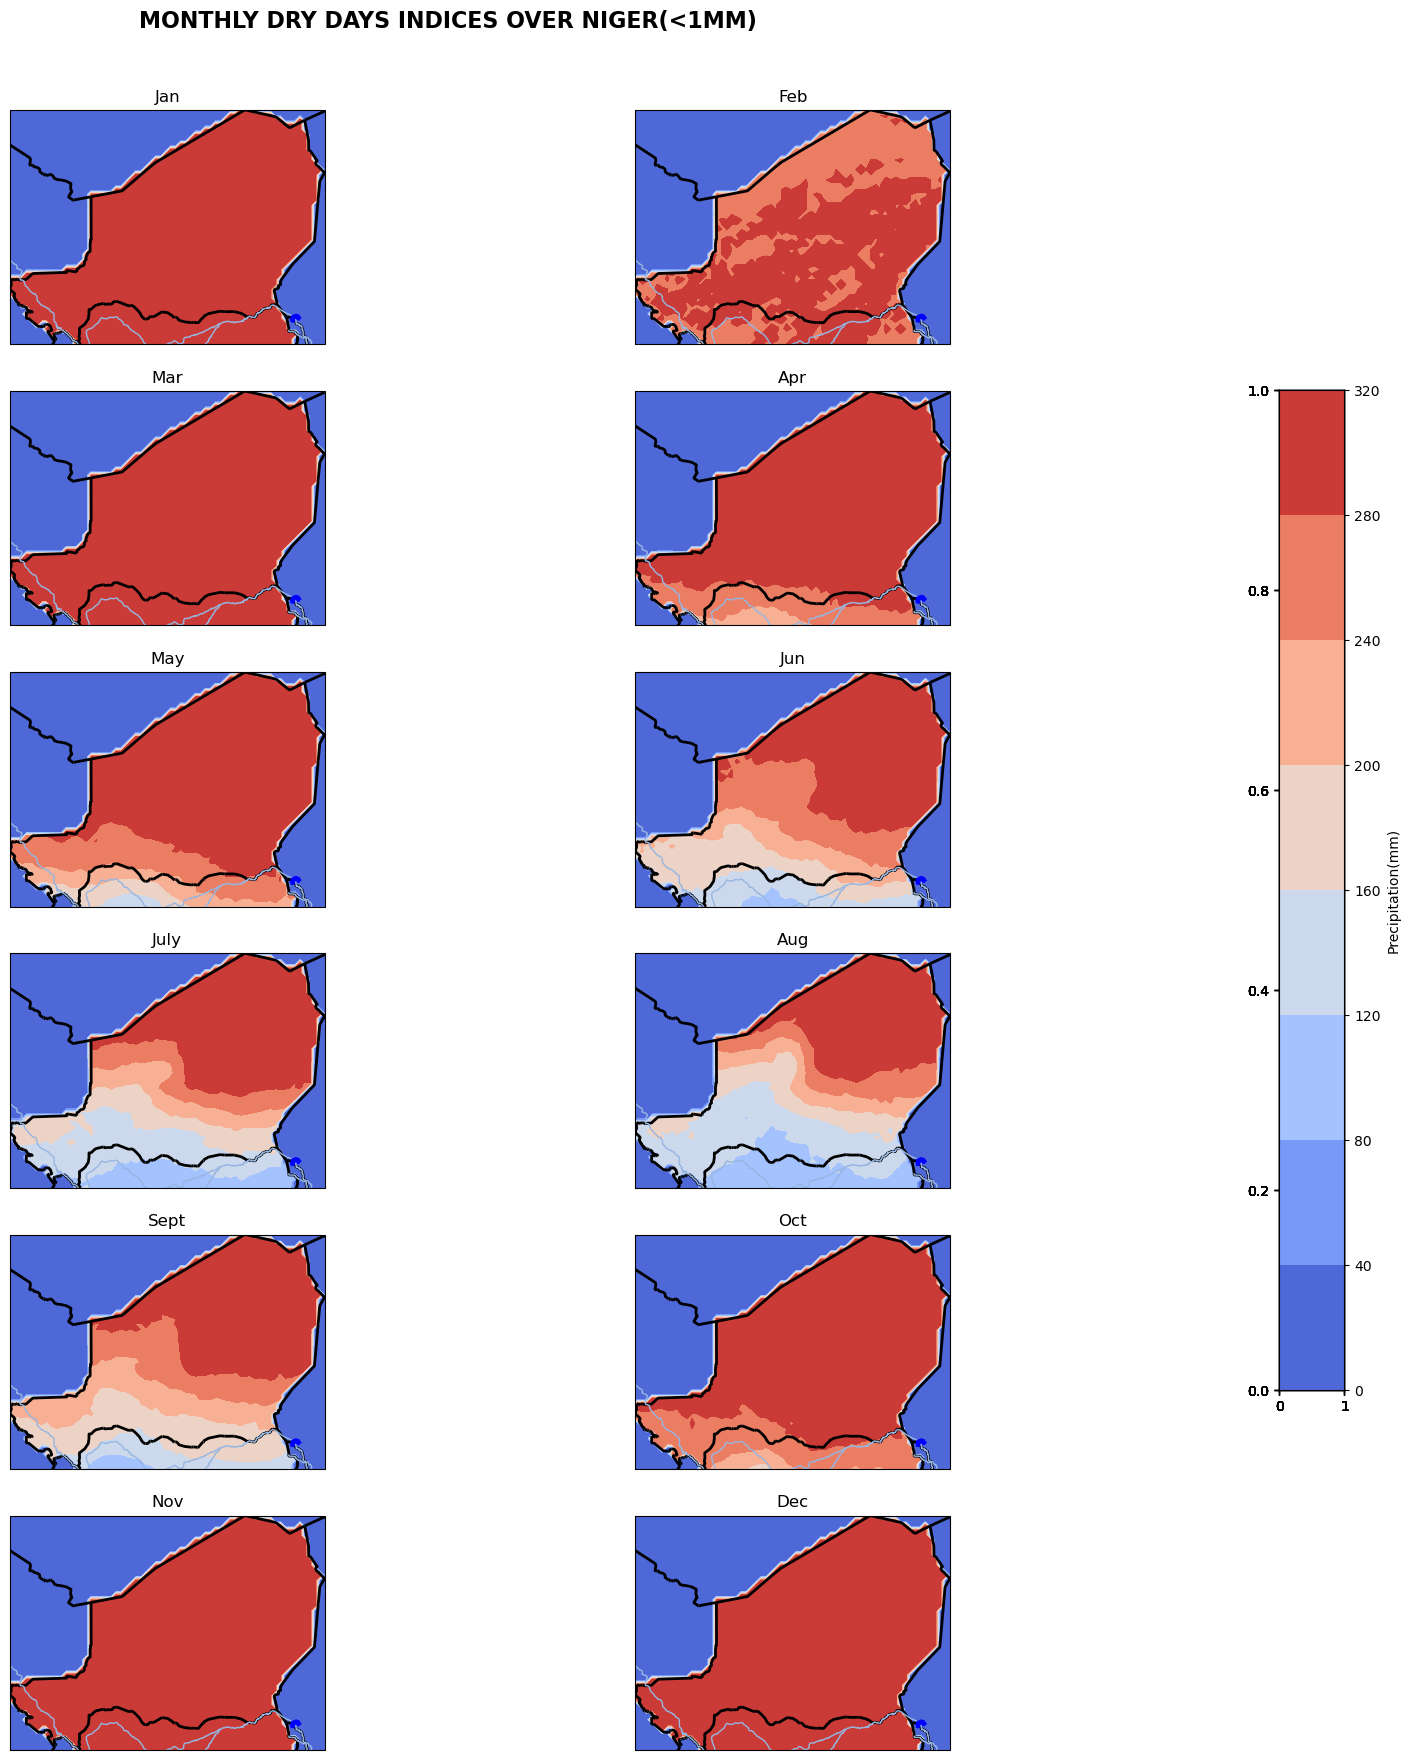

In [53]:
fig,ax=plt.subplots(6,2,figsize=(26,20),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([0.15,15.98,11.72,23.51], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(dry_days_per_month2.lon,dry_days_per_month2.lat,dry_days_per_month2[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY DRY DAYS INDICES OVER NIGER(<1MM)', fontweight='bold',fontsize=16);
plt.savefig('12.png');

In [54]:
wet_days_per_month2= (ds>10).groupby('datetime.month').sum(dim='datetime')
wet_days_per_month2

<xarray.DataArray 'precip' (month: 12, lat: 79, lon: 65)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 15.0 15.25 15.5 15.75 16.0
  * lat      (lat) float32 24.0 23.75 23.5 23.25 23.0 ... 5.5 5.25 5.0 4.75 4.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

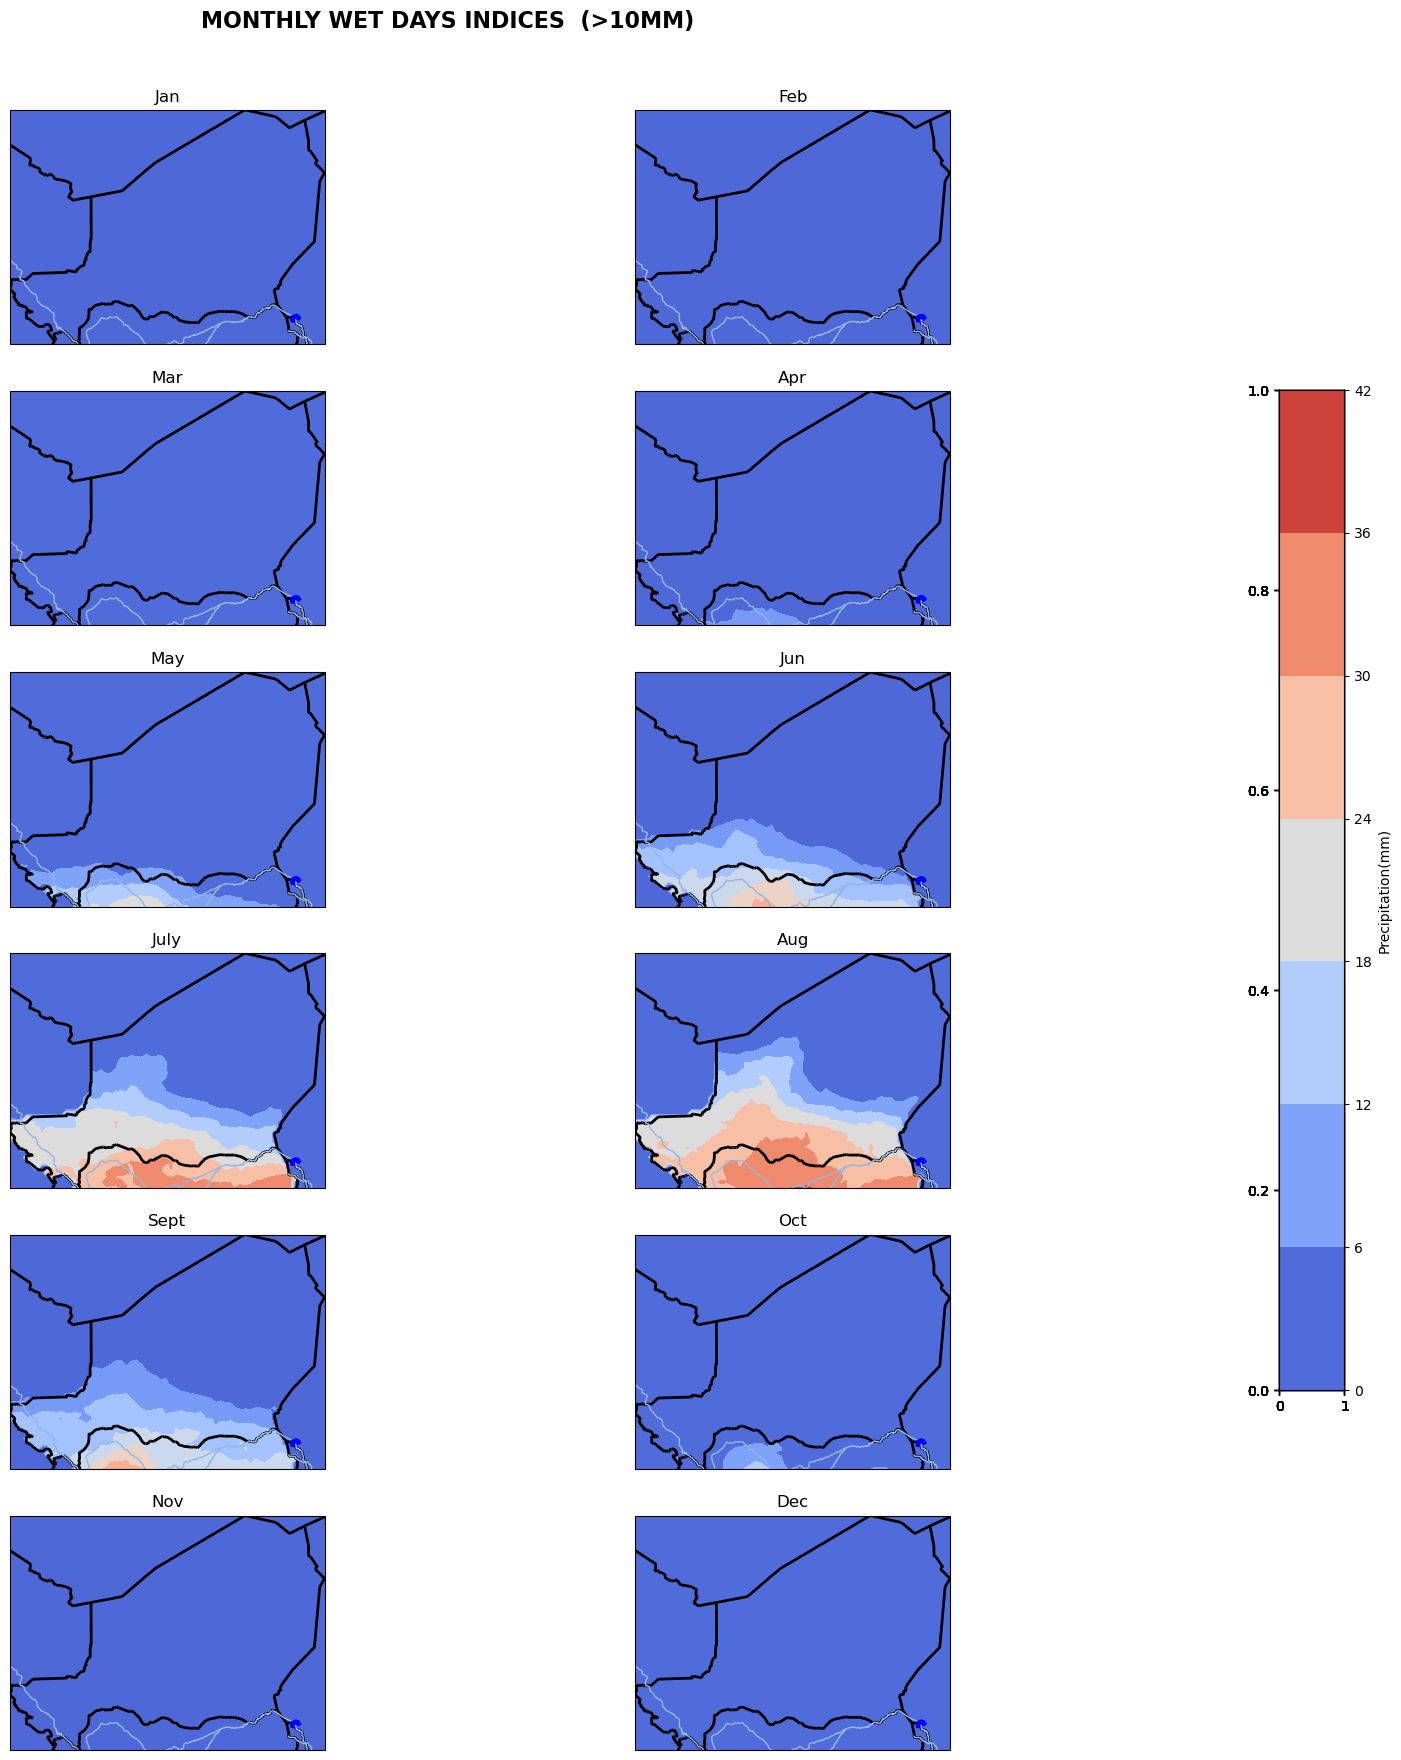

In [55]:
fig,ax=plt.subplots(6,2,figsize=(26,20),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([0.15,15.98,11.72,23.51], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_per_month2.lon,wet_days_per_month2.lat,wet_days_per_month2[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY WET DAYS INDICES  (>10MM)', fontweight='bold',fontsize=16);
plt.savefig('13.png');

In [56]:
wet_days_per_month3= (ds>20).groupby('datetime.month').sum(dim='datetime')
wet_days_per_month3

<xarray.DataArray 'precip' (month: 12, lat: 79, lon: 65)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 15.0 15.25 15.5 15.75 16.0
  * lat      (lat) float32 24.0 23.75 23.5 23.25 23.0 ... 5.5 5.25 5.0 4.75 4.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

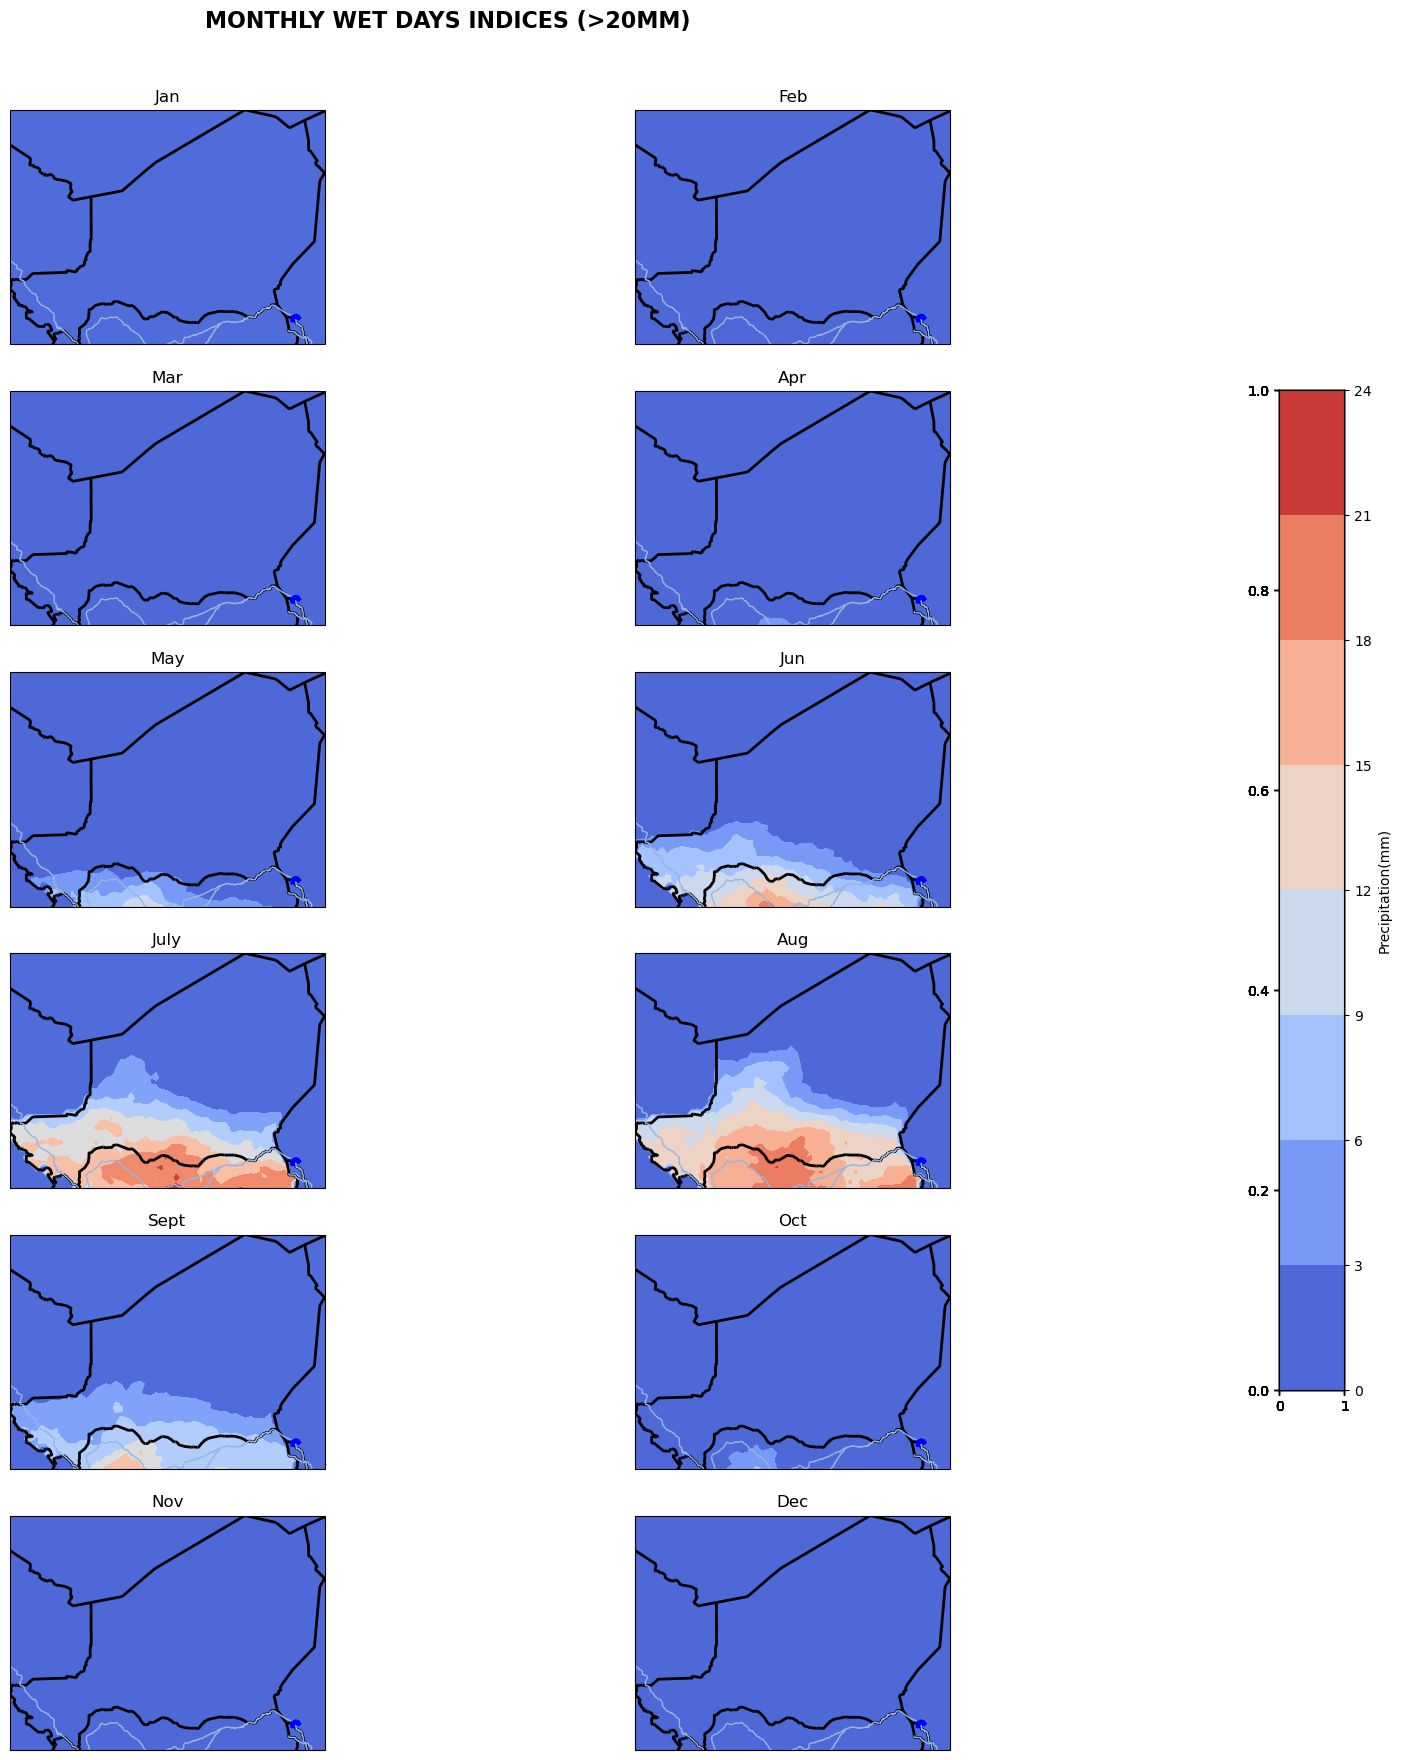

In [57]:
fig,ax=plt.subplots(6,2,figsize=(26,20),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([0.15,15.98,11.72,23.51], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_per_month3.lon,wet_days_per_month3.lat,wet_days_per_month3[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)'),
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY WET DAYS INDICES (>20MM)', fontweight='bold',fontsize=16);
plt.savefig('14.png');